In [50]:
import numpy as np
import pandas as pd
import sys, math

RUN_TESTS = True

# Function implementations
## Non-negative Matrix Factorisation implementation
### Provided design specification
Implement the `nmf()` subroutine in the provided code base. This function takes as input a matrix `X`, the number of required components `n` (“number of features” from the lecture), a maximum number of iterations, and an error tolerance threshold. It returns two matrices `W` and `H` (with width/height `n`) such that `WH` approximates `X`.

Use the algorithm from the lecture slides as the algorithm to compute `W` and `H`. For more information about it, you can read about it here.

If at a certain point in the algorithm the reconstruction error of each consecutive iteration is less than `tol`, then you can stop early.

`Hint: if at some place of the algorithm it's possible for a division by 0 to happen, add 1e-9 to the denominator.`


In [51]:
def func():
    W = np.array([[2, 2, 2, 2], [4, 4, 4, 4]])
    H = np.array([[1, 2, 3, 4], [4, 4, 2, 0]])
    
    e = 1e-15
    print(e)
    
    print(W)
    print(H)
    print(W/(H+e))
    print(W * H)
func()

1e-15
[[2 2 2 2]
 [4 4 4 4]]
[[1 2 3 4]
 [4 4 2 0]]
[[2.00000000e+00 1.00000000e+00 6.66666667e-01 5.00000000e-01]
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 4.00000000e+15]]
[[ 2  4  6  8]
 [16 16  8  0]]


In [52]:
# Non-negative matrix factorisation implementation and tests

RUN_TESTS = True

def nmf(X: pd.DataFrame, n_components: int, max_iter: int=1000, tol: float=1e-3):
    """
    Decomposes the original sparse matrix X into two matrices W and H. 
    """
    # Initialize W and H with random non-negative values
    W = np.random.rand(X.shape[0], n_components)
    H = np.random.rand(n_components, X.shape[1])

    # START ANSWER
    V = X.to_numpy()
    e = 1e-99

    iteration = 0
    
    prev_error = None
    
    error = V - (W @ H)
    error = np.power(error, 2)
    error = np.trace(error)
    error = np.sqrt(error)
    error_diff = np.inf
    print(error_diff)
    
    while (error_diff > tol and iteration < max_iter):
        numerator = V @ H.T
        denominator = W @ H @ H.T
        division = numerator / (denominator + e)
        W = W * division

        numerator = W.T @ V
        denominator = W.T @ W @ H
        division = numerator / (denominator + e)
        H = H * division
        
        # Remember the error from previous iteration
        prev_error = error
        # Calculate reconstruction error
        error = V - (W @ H)
        error = np.power(error, 2)
        error = np.trace(error)
        error = np.sqrt(error)
        # Error differential
        error_diff = prev_error - error
        iteration += 1
        # TODO Fix error

    print(f"NMF optimized with {iteration} iterations and error of {error}")
    # V = X.to_numpy()
    # i = 0
    # E = np.inf
    # Enew = np.linalg.norm(V - W@H, 'fro')**2
    # print(E)
    # print(Enew)
    # while((E-Enew) > tol and i < max_iter): 
    #     i += 1
    #     W *= (V@H.T) / (W@H@H.T + 1e-9)
    #     H *= (W.T@V) / (W.T@W@H + 1e-9)

    #     E = Enew
    #     Enew = np.linalg.norm(V - W@H, 'fro')**2
    #     Enew = np.sqrt(Enew)
    # END ANSWER

    return W, H

if RUN_TESTS:
    import unittest
    
    class TestSolution(unittest.TestCase):
        def setUp(self):
            np.random.seed(42)

        def test_2_by_2(self):
            col1 = [1, 1]
            col2 = [0, 0]
            sparse_matrix = pd.DataFrame(list(zip(col1, col2)))
            w, h = nmf(sparse_matrix, 4, 10)
            reconstructed_matrix = pd.DataFrame(data=np.dot(w, h),
                                                index=sparse_matrix.index,
                                                columns=sparse_matrix.columns)
            pd.testing.assert_frame_equal(sparse_matrix, reconstructed_matrix, check_dtype=False)

        def test_3_by_3(self):
            col1 = [1, 1, 0]
            col2 = [0, 0, 0]
            col3 = [0, 1, 0]
            sparse_matrix = pd.DataFrame(list(zip(col1, col2, col3)))
            w, h = nmf(sparse_matrix, 5, 50)
            reconstructed_matrix = pd.DataFrame(data=np.dot(w, h),
                                                index=sparse_matrix.index,
                                                columns=sparse_matrix.columns)
            pd.testing.assert_frame_equal(sparse_matrix, reconstructed_matrix, check_dtype=False, atol=0.05)

        def test_3_by_2(self):
            col1 = [0, 1, 0]
            col2 = [0, 0, 1]
            sparse_matrix = pd.DataFrame(list(zip(col1, col2)))
            w, h = nmf(sparse_matrix, 5, 50)
            reconstructed_matrix = pd.DataFrame(data=np.dot(w, h),
                                                index=sparse_matrix.index,
                                                columns=sparse_matrix.columns)
            pd.testing.assert_frame_equal(sparse_matrix, reconstructed_matrix, check_dtype=False, atol=0.05)

        def test_5_by_5(self):
            col1 = [0, 1, 0, 0, 0]
            col2 = [0, 0, 1, 1, 0]
            col3 = [0, 0, 0, 0, 0]
            col4 = [0, 1, 0, 0, 0]
            col5 = [1, 0, 0, 0, 0]
            sparse_matrix = pd.DataFrame(list(zip(col1, col2, col3, col4, col5)))
            w, h = nmf(sparse_matrix, 5, 50)
            reconstructed_matrix = pd.DataFrame(data=np.dot(w, h),
                                                index=sparse_matrix.index,
                                                columns=sparse_matrix.columns)
            pd.testing.assert_frame_equal(sparse_matrix, reconstructed_matrix, check_dtype=False, atol=0.05)

    unittest.main(argv=[''], verbosity=2, exit=False)

test_2_by_2 (__main__.TestSolution.test_2_by_2) ... ok
test_3_by_2 (__main__.TestSolution.test_3_by_2) ... ok
test_3_by_3 (__main__.TestSolution.test_3_by_3) ... FAIL
test_5_by_5 (__main__.TestSolution.test_5_by_5) ... FAIL

FAIL: test_3_by_3 (__main__.TestSolution.test_3_by_3)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\leohe\AppData\Local\Temp\ipykernel_12168\1079731376.py", line 96, in test_3_by_3
    pd.testing.assert_frame_equal(sparse_matrix, reconstructed_matrix, check_dtype=False, atol=0.05)
  File "c:\Users\leohe\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\_testing\asserters.py", line 1209, in assert_frame_equal
    assert_series_equal(
  File "c:\Users\leohe\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\_testing\asserters.py", line 1005, in assert_series_equal
    _testing.assert_almost_equal(
  File "testing.pyx", line 55, in pandas._libs.testing.assert_almo

inf
NMF optimized with 3 iterations and error of 0.0
inf
NMF optimized with 9 iterations and error of 0.016011692240558623
inf
NMF optimized with 8 iterations and error of 0.0024180526799578717
inf
NMF optimized with 2 iterations and error of 0.5732558597925387


## MinHashing implementation
### Provided design specification
Implement the `compute_signature()` subroutine in the provided code base. This function takes as input a list of `k` `HashFunction` and a list of `n` sets of integers, representing which `ids` each user has liked.

Have a look in the library to see how `HashFunction` is defined.

It should return the minhash signature for the given input, when applying the provided hash functions. The signature should be of size `k x n`, where each column of the signature matrix represents the index of the user’s liked ids, and the rows represent the index of each hash function.

The goal is for similar sets of liked `ids` to have similar columns in the signature matrix. See the tests for an example of what’s expected.

In [53]:
ids = [{1, 2, 3, 4}, {1}, {4, 5}, {1, 2, 3}, {1}]
space = set().union(*ids)
a = sorted(space)

print(np.full((0, 0), sys.maxsize))

[]


In [54]:
# Minhashing implementation and tests
class HashFunction:
    """
    Library class HashFunction. Do not change
    This HashFunction class can be used to create an unique hash given an alpha and beta.
    """
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta

    def hashf(self, x: float, n: int):
        """
        Returns a hash given integers x and n.
        :param x: The value to be hashed
        :param n: The number of unique ids of all sets (modulo)
        :return: The hashed value x given alpha and beta
        """
        
        hash_value = 0
        hash_value =  (self.alpha * x + self.beta) % n
        return hash_value

def compute_signature(hashes: list[HashFunction], ids: list[set[int]]):
    """
    This function will calculate the MinHash signature matrix from our sets of ids
    using the list of hash functions (hashes)
    :param hashes: The list of hash functions of arbitrary length
    :param ids: The list of sets of ids
    :return: The MinHash signature matrix for the given sets of ids
    """
    
    result = np.full((len(hashes), len(ids)), sys.maxsize)
    space = set().union(*ids)
    sorted_space = sorted(space)
    
    # START ANSWER
    if len(hashes) == 0 or len(ids) == 0:
        return np.full((len(hashes), len(ids)), sys.maxsize)
    
    max_id = max(sorted_space)
    number_distinct_ids = len(sorted_space)
    
    # Initialise an existence matrix of max_id x number of id sets
    # The matrix is 0-indexed, for index 0 matches `id` = 1
    existence_matrix = np.full((number_distinct_ids, len(ids)), -1)

    # Populate existence matrix
    for i in range(0, existence_matrix.shape[0]):
        for j in range(0, existence_matrix.shape[1]):
            # Existence matrix entry (`i`, `j`) will be 1 if set `j` contains id (= i + 1)
            # Else, it will be 0
            id = sorted_space[i]
            column_set = ids[j]
            existence_matrix[i, j] = 1 if id in column_set else 0

    # Calculate hash signature
    for i in range(0, existence_matrix.shape[0]):
        calculated_hashes = []
        # First, we pre-calculate the hashes for the current row index `i`
        for hashing_function in hashes:
            calculated_hashes.append(hashing_function.hashf(i, number_distinct_ids))

        # For every column in the existence matrix, if the entry is 1 (column j contains id i + 1)
        # Update the hash signature for (`i`, `j`) if the new hash for row i is smaller than any previous hash
        for j in range(0, existence_matrix.shape[1]):
            if existence_matrix[i, j] == 1:
                for result_i in range(0, result.shape[0]):
                    result[result_i, j] = min(result[result_i, j], calculated_hashes[result_i])
    # END ANSWER
    return result

if RUN_TESTS:
    import unittest

    class TestSolution(unittest.TestCase):

        def test_multiple_sets(self):
            h1 = HashFunction(2, 3)
            h2 = HashFunction(4, 2)
            h3 = HashFunction(1, 3)
            h4 = HashFunction(3, 1)

            test_hashes = [h1, h2, h3, h4]

            test_sets = [{1, 2, 3, 4}, {1}, {4, 5}, {1, 2, 3}, {1}]
            
            result = compute_signature(test_hashes, test_sets)
            expected = np.array([[0, 3, 1, 0, 3],
                                [0, 2, 3, 0, 2],
                                [0, 3, 1, 0, 3],
                                [0, 1, 0, 1, 1]])
            np.testing.assert_array_equal(result, expected)

        def test_identical_sets(self):
            h1 = HashFunction(2, 3)
            h2 = HashFunction(4, 2)
            h3 = HashFunction(1, 3)
            h4 = HashFunction(3, 1)

            test_hashes = [h1, h2, h3, h4]

            test_sets = [{2, 3}, {2, 3}, {2, 3}]
            
            result = compute_signature(test_hashes, test_sets)
            expected = np.array([[1, 1, 1],
                                [0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0]])
            np.testing.assert_array_equal(result, expected)

        def test_mutually_exclusive_sets(self):
            h1 = HashFunction(2, 3)
            h2 = HashFunction(4, 2)
            h3 = HashFunction(1, 3)

            test_hashes = [h1, h2, h3]

            test_sets = [{1, 2}, {3, 4}, {5, 6}]
            
            result = compute_signature(test_hashes, test_sets)
            expected = np.array([[3, 1, 1],
                                [0, 2, 0],
                                [3, 0, 1]])
            np.testing.assert_array_equal(result, expected)
        
        def test_non_consecutive_set(self):
            h1 = HashFunction(2, 3)
            h2 = HashFunction(4, 2)
            h3 = HashFunction(1, 3)
            h4 = HashFunction(3, 1)

            test_hashes = [h1, h2]

            test_sets = [{2, 3, 6}, {2, 6}, {2, 3}, {3, 6}]
            
            result = compute_signature(test_hashes, test_sets)
            expected = np.array([[0, 0, 0, 1],
                                 [0, 1, 0, 0]])
            np.testing.assert_array_equal(result, expected)

    unittest.main(argv=[''], verbosity=2, exit=False)

test_identical_sets (__main__.TestSolution.test_identical_sets) ... ok
test_multiple_sets (__main__.TestSolution.test_multiple_sets) ... ok
test_mutually_exclusive_sets (__main__.TestSolution.test_mutually_exclusive_sets) ... ok
test_non_consecutive_set (__main__.TestSolution.test_non_consecutive_set) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK


In [55]:
# Ingest data
train_file_path = 'lab2_train.csv'
test_file_path = 'lab2_test.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')
test_data = pd.read_csv(test_file_path, delimiter=',')

# Clean up test_data labels
train_data.rename(columns=str.strip, inplace=True)
test_data.rename(columns=str.strip, inplace=True)

In [56]:
# def check_repeated_pair(from_id, to_id, index):
#     for (i, row) in train_data.iterrows():
#         other_from_id = row['user_from_id']
#         other_to_id = row['user_to_id']
#         if from_id == other_from_id and other_to_id == to_id and not i == index:
#             print(f"Equality found: {i}: {other_from_id}, {other_to_id}")

# def check_reversed_pair(from_id, to_id):
#     for (i, row) in train_data.iterrows():
#         other_from_id = row['user_from_id']
#         other_to_id = row['user_to_id']
#         if from_id == other_to_id and other_from_id == to_id:
#             print(f"Equality found: {i}: {other_from_id}, {other_to_id}")
    

# tuple_set = set()
# tuple_dict = dict()
# duplicate_set = set()
# count = 0

# for (i, row) in train_data.iterrows():
#     from_id = row['user_from_id']
#     to_id = row['user_to_id']
    
#     tuple = (from_id, to_id)
#     if tuple in tuple_set:
#         # print(f"{i}: {from_id},{to_id}")
#         duplicate_set.add(tuple)
#         count += 1
#     tuple_set.add(tuple)
    
#     if tuple in tuple_dict:
#         tuple_dict[tuple] =+ 1
#     else:
#         tuple_dict[tuple] = 0

# print(count)
# count = 0

# for key in tuple_dict:
#     if tuple_dict[key] > 0:
#         count += 1
        # print(key, tuple_dict[key])
        
# a, b, True, ---
# a, b, False, ---
        
# print(count)


# for tuple in duplicate_set:
#     self_from_id = tuple[0]
#     self_to_id = tuple[1]
#     for (i, row) in train_data.iterrows():
#         from_id = row['user_from_id']
#         to_id = row['user_to_id']
#         # is_like = row['is_like']
#         # is_match = row['is_match']
        
#         print(f"{i}: {from_id}, {to_id}")
#         check_repeated_pair(from_id, to_id, i)
#         print("")
        
#         print("")

a=0
b=0
for i, row in train_data.iterrows():
    if row['is_like']: a+=1
    b+=1
print(a, "/", b, "=", a/b)


12637 / 76392 = 0.1654230809508849


**Timo's notes about the data**

**Practical information**  
Data frame ID is equal to line number minus 2  
The last two coluns of the data have the Object type, and can be of type bool or NaN  
We have assumed people are not shown themselves


**Hypothesis 1**: 'Mirrored' lines don't exist (two lines the same two people in opposite order)
False: lines 172 and 7803

**Hypothesis 2**: Mirrored lines exist, which represent the rare case two people are shown eachother at the same time  
False: The two lines below contradict eachother:
3476,1562,True,False
1562,3476,True,True

**Hypothesis 3**: A pair of people may be shown eachother more than once (and change their mind)  
Note: Perfectly duplicate lines are possible  
Note: Mirrored or duplicate lines tend to be sort of kinda far away from eachother (what is far?)

**TO-DO:**  
Visualizing

# Start of Report

# CSE2525 Data Mining: Lab 2 - Matrix Decomposition

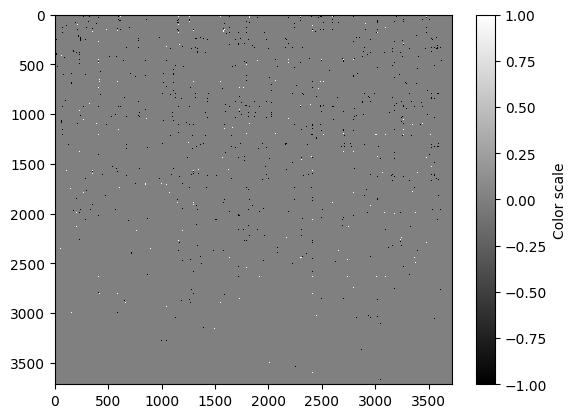

In [57]:
# Initiate a new user-user matrix showing every posibility of a user being reccomended to another user
n_users = 3716
user_interactions = np.zeros((n_users+1,n_users+1))

# Populate the matrix with likes and dislikes from the datas
# The entries are assumed to be in temporal order, and the most recent entry is implicitly given priority in case of contradicting data (Because this probably represents a person changing their mind)
def get_user_interactions(data):
  for i, row in data.iterrows():
    from_id = row['user_from_id']
    to_id = row['user_to_id']
    is_like = row['is_like']
    is_match = row['is_match']

    if(is_like):
      user_interactions[from_id,to_id] = 1
      # If user A got a match with user B, user B must have also liked user A. We log this, too
      if(is_match): user_interactions[to_id,from_id] = 1
    else: user_interactions[from_id,to_id] = -1

  return user_interactions  

user_interactions = get_user_interactions(train_data)

# The bolow plot shows interactions. White dots are likes, and black dots are dislikes (grey means no information.)
# No users have been removed. Even a user with a single dislike gives some useful information,
# as the algorithm can't 'get away with' randomly assigning this user high values and concluding the user simply likes everyone.
# While empty rows and columns provide no information and may as well be removed, there's little point to doing so.
# These rows and columns don't affect other ones, as they are irrelevant to the reconstruction error.
import matplotlib.pyplot as plt
plt.imshow(user_interactions,cmap='grey',
interpolation='nearest', aspect='auto')
plt.colorbar(label='Color scale')
plt.show()

In [58]:
# Apply the nmf-algorithm (similar to above)
def nmf(X, n_components, max_iter, tol):
  # Eliminate negative values for nmf-algorithm (Likes are 1 here, dislikes/unknowns are 0)
  V = np.where(X == 1, 1, 0)
  # Create layermask indicating which values in the matrix are known (Likes/dislikes are 1 here, unknowns are 0)
  layermask = np.where(X == 0, 0, 1)

  W = np.random.rand(n_users+1, n_components)
  H = np.random.rand(n_components, n_users+1)
  i = 0
  E = np.inf
  Enew = np.linalg.norm((V - W@H)*layermask, 'fro') # Multiply difference matrix with layermask, so missing values don't affect reconstruction error
  while(E-Enew > tol and i < max_iter): 
    i += 1
    W *= (V@H.T) / (W@H@H.T + 1e-9) # No need to multiply V with the layermask here, unknown values in V are already set to 0
    H *= (W.T@V) / (W.T@W@H + 1e-9)

    E = Enew
    Enew = np.linalg.norm((V - W@H)*layermask, 'fro')
    print("Iteration", i, "complete")
  return W@H


result_matrix = nmf(user_interactions, 5, 100, 1e-3)

Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
Iteration 10 complete
Iteration 11 complete
Iteration 12 complete
Iteration 13 complete
Iteration 14 complete
Iteration 15 complete
Iteration 16 complete
Iteration 17 complete
Iteration 18 complete
Iteration 19 complete
Iteration 20 complete
Iteration 21 complete
Iteration 22 complete
Iteration 23 complete
Iteration 24 complete
Iteration 25 complete
Iteration 26 complete
Iteration 27 complete
Iteration 28 complete
Iteration 29 complete
Iteration 30 complete
Iteration 31 complete
Iteration 32 complete
Iteration 33 complete
Iteration 34 complete
Iteration 35 complete
Iteration 36 complete
Iteration 37 complete
Iteration 38 complete
Iteration 39 complete
Iteration 40 complete
Iteration 41 complete
Iteration 42 complete
Iteration 43 complete
Iteration 44 complete
Iteration 45 complete
Iteration 46 comple

In [59]:
# Use result matrix to predict test data
def apply_matrix(matrix, apply_to):
  result = []
  for i, row in apply_to.iterrows():
    from_id = row['user_from_id']
    to_id = row['user_to_id']

    # Predict true iff the users are both known and they have a positive score
    if(from_id>n_users or to_id>n_users or matrix[from_id, to_id]<=0.01): result.append(False)
    else: result.append(True)
  return result  

x = apply_matrix(result_matrix,test_data)
print(x)
print(np.sum(x), "/", len(x))

[False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, True, False, False, False, False, True, False, False, False, False, True, Tr

In [60]:
# # Cross-validate
# n_chunks = 10
# chunks = np.array_split(train_data, n_chunks)

# for i in range(n_chunks):
#     train_chunk = []
#     # Select current test chunk and synthesize train chunk from remaining chunks
#     for j, row in chunks.iterrows():
#         if i==j: test_chunk = row
#         else: train_chunk.append(row)
#     # Apply all of the above code
#     generated_matrix = nmf(get_user_interactions(train_chunk), 5, 100, 1e-3)
#     result_list = apply_matrix(generated_matrix,test_chunk)
#     score = 0
#     for j, row in test_chunk:
#         if row['is_like'] == result_list[j]: score+=1
#     print(100*score/len(test_chunk),"%")    
    
